# Cardio Good Fitness Dataset

## Description

This dataset is a market research that chooses to explore whether there are contrasts across the product lines as for client characteristics. The team decides to retrieve data on individuals who purchased a treadmill at a CardioGoodFitness retail store during a period of three months.

<span style="color: red; font-family: Arial;font-weight:bold;font-size:2em;">Contents</span> 

* Description
* Importing Dataset
* Reading the Dataset
* Checking For duplictes in Datasets
* Dealing with the duplicates in the Dataset
* Checking for missing values in Dataset
* Dealing with incorrect and unwanted observations
* Dealing with Outliers
* Discover outliers with Statistical Rules
* Using Visaualisation Tools 

<span style="color: red; font-family: Arial;font-weight:bold;font-size:2em;">Importing the Library</span>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Importing the Dataset</span>

In [9]:
Data = pd.read_csv('CardioGoodFitness.csv')

In [11]:
Data1 = Data.copy() #

In [57]:
Data = pd.read_csv('CardioGoodFitness.csv') #reading the data and showing a few rows of the data
Data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Observation:

* The dataset does not seem to have any missing 

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Checking the shape of Data</span>

In [58]:
Data.shape #this will show how many rows and columns in this dataset

(180, 9)

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Checking the Dataset Information</span>

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Median

In [59]:
Data.median() #to show the median of the numerical values

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

## Mode

In [68]:
print(Data['Age'].mode())

0    25
dtype: int64


## Quantile 25%

In [63]:
print("Data_quantile(25%):",Data.quantile(q=0.25)) #this prints the value below which 25% of the data in the datasets

Data_quantile(25%): Age             24.00
Education       14.00
Usage            3.00
Fitness          3.00
Income       44058.75
Miles           66.00
Name: 0.25, dtype: float64


## Quantile 50%

In [64]:
print("Data_quantile(50%)",Data.quantile(q=0.50)) #displays the value below which 50% of the data lies

Data_quantile(50%) Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
Name: 0.5, dtype: float64


## Quantile 75%

In [65]:
print("Data_quantile(75%):",Data.quantile(q=0.75))

Data_quantile(75%): Age             33.00
Education       16.00
Usage            4.00
Fitness          4.00
Income       58668.00
Miles          114.75
Name: 0.75, dtype: float64


## IQR

This is the difference between the 75th and 25th percentile of the dataset

In [73]:
Data.quantile(0.75) - Data.quantile(0.25) #this code will represent an output IQR values for all the attributes

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64

In [76]:
Data.max()


Product           TM798
Age                  50
Gender             Male
Education            21
MaritalStatus    Single
Usage                 7
Fitness               5
Income           104581
Miles               360
dtype: object

In [77]:
Data.min()

Product              TM195
Age                     18
Gender              Female
Education               12
MaritalStatus    Partnered
Usage                    2
Fitness                  1
Income               29562
Miles                   21
dtype: object

## Variance

In [82]:
print(Data.var()) #this code will display how much of the data was dispersed

Age          4.821217e+01
Education    2.614867e+00
Usage        1.176785e+00
Fitness      9.194289e-01
Income       2.724706e+08
Miles        2.689833e+03
dtype: float64


## Standard Deviation

The below code will display an output of how much data was deviated from the mean 

In [83]:
print(Data.std())

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64


## Covariance

This provides the a measure of strength of correlation between two variable or more set of variables.

In [84]:
Data.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Checking For Duplicates in the Dataset</span>

In [15]:
#Determing if there any duplicates in the data
dupes = Data.duplicated()
sum(dupes)

0

### Observation

After checking the dataset to see if there is any values which have been duplicated, it shows that there is no duplication in this dataset.

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Frequency Table for Age</span>

In [40]:
my_tab = pd.crosstab(index=Data["Age"], columns="count")
my_tab

col_0,count
Age,
18,1
19,4
20,5
21,7
22,7
23,18
24,12
25,25
26,12


<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Checking For Null Values in the Dataset</span>

In [22]:
Data.isna().any() #checking for null values

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

### Observation

After checking the dataset it is obvious that there is no null value in this dataset

In [23]:
Data.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Checking For Skewness and Kurtosis</span>

In [85]:
Data.skew() #this is to measure the skewness of every attribute

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Histogram for Checking Skewness in the Dataset</span>

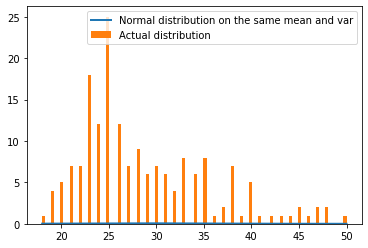

In [86]:
import scipy.stats as stats

#this is to convert panda DataFrame to numpy array and sort the dataset
h = np.asarray(Data['Age'])
h = sorted(h)

#now the scipy stats module to fit a normal distribution with the mean and standar deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

#this will now plot both series on a histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution on the same mean and var")
plt.hist(h, bins=100, label="Actual distribution")
plt.legend()

* From the above visualisation it reveals that the graph is negatively skewed.

## Histogram

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

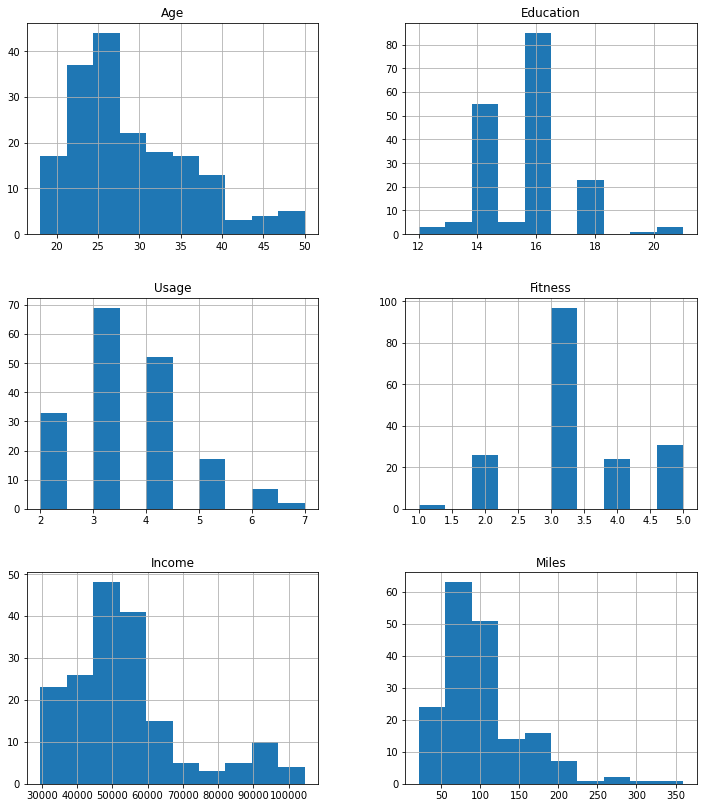

In [42]:
Data.hist(figsize=(12,14))

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

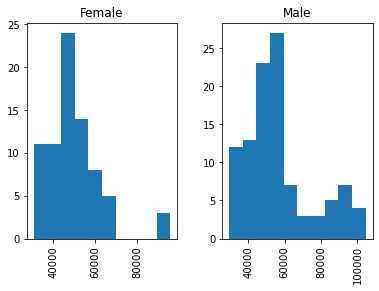

In [43]:
Data.hist(by='Gender' ,column = 'Income')

## Boxplots

This is a technique for graphically displaying data through various quartiles.

In [27]:
pd.crosstab(Data['Product'],Data['Gender']) #this is to check the most popular product model by the genders

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


<AxesSubplot:xlabel='Gender', ylabel='Age'>

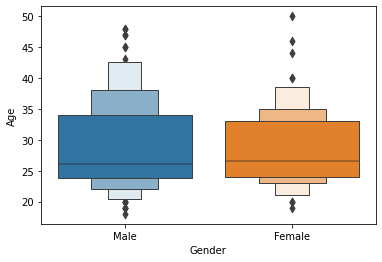

In [29]:
sns.boxenplot(x='Gender' ,y='Age' ,data=Data) #this is to display the boxplot from the table above

In [31]:
pd.crosstab(Data['Product'] ,Data['MaritalStatus']) #this is to check which product models are used by either singles or partners

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

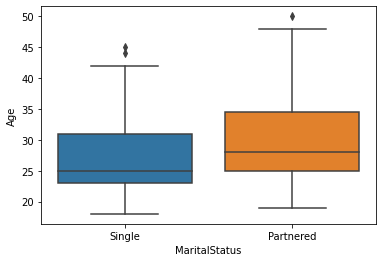

In [61]:
sns.boxplot(x='MaritalStatus' ,y='Age' ,data=Data)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

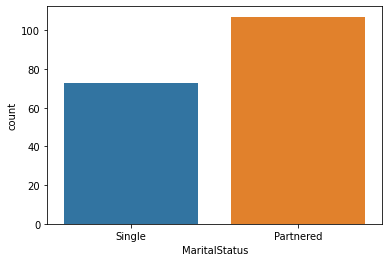

In [36]:
sns.countplot(x='MaritalStatus' ,data=Data)

### Observations

* Generally both partners and singles prefer the product model 'TM195'
* There are more "Partnered" who prefer the CardiGoodFitness equipment.
* The "Partnered" age in this dataset begins from the age "26"
* While the "Single" people in this data set bein from the ages of "23-24"

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Univariate</span>

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Average Age in the Dataset</span>

In [44]:
Data['Age'].mean()

28.788888888888888

<AxesSubplot:xlabel='Age', ylabel='Density'>

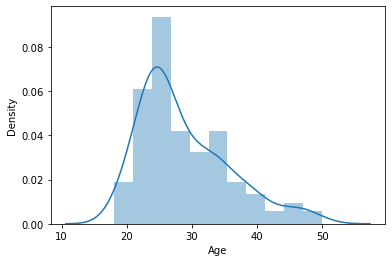

In [45]:
sns.distplot(Data['Age'])

<AxesSubplot:xlabel='Miles', ylabel='Density'>

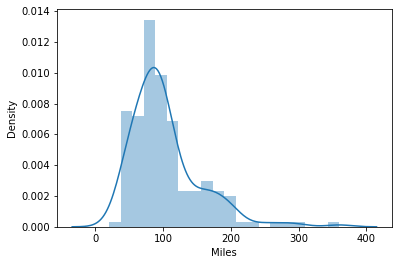

In [89]:
sns.distplot(Data['Miles'])

### Observation 

This shows that more of the points of the 'Miles' are from 100-200 miles while many are also below 100 miles and a few a greater than 250 miles

### Count Plot

<AxesSubplot:xlabel='Product', ylabel='count'>

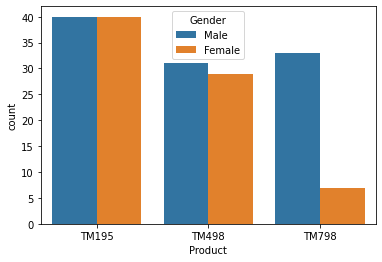

In [46]:
sns.countplot(x='Product' ,hue='Gender' ,data=Data)

<span style="color: red; font-family-family: Arial;font-weight:bold;font-size:2em;">Bivariate</span>

## Correlation Heatmap

In [49]:
corr=Data.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

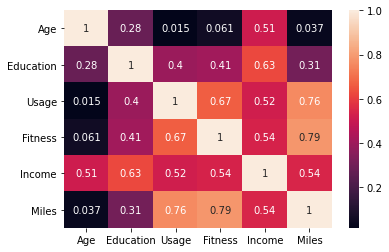

In [55]:
sns.heatmap(corr,annot=True) #this will show an outline of different variables

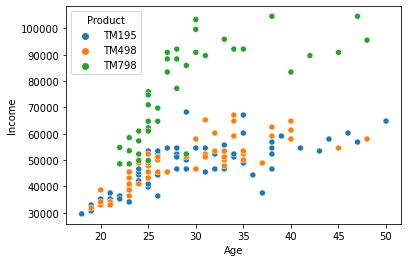

In [87]:
sns.scatterplot(x='Age' , y='Income' , data=Data, hue='Product')
plt.show()

#this scatterplot is used to answer the question which is"How does income and age affect the decison of which product model should be bought

### Observation

• From the above graph it illustrates that TM798 is the most expensive model compared to the rest of the models.

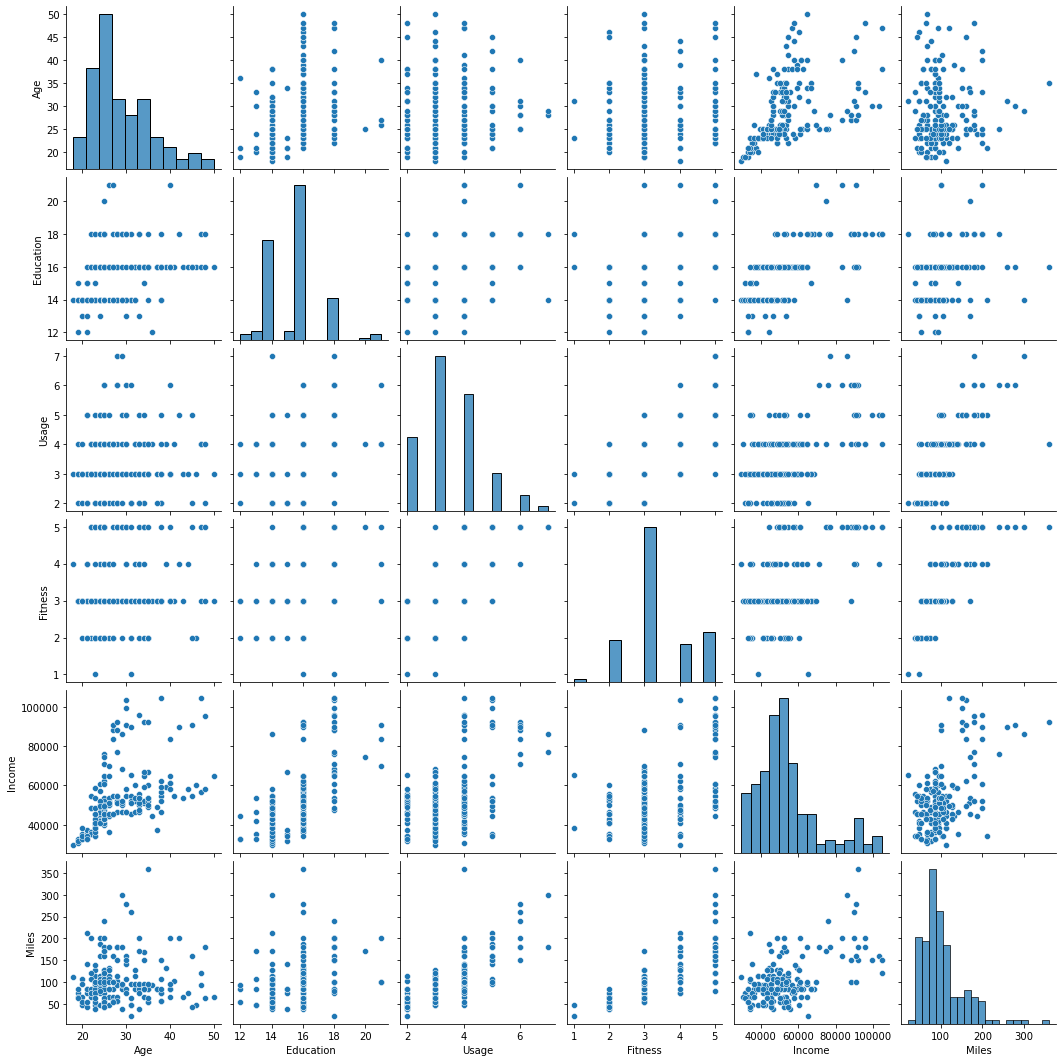

In [88]:
sns.pairplot(Data) #this shows an immediate display of the data

### Observation

From the above plot, we can say that the age and miles are highly corelated, so when the age increases the miles also increases, they are direcly propotional to each other

Fitness and usage are slightly correlated with miles

Age and income are positively corrleated